In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')
data.shape

(891, 12)

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
data['Age']=imp.fit_transform(data[['Age']])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data['Cabin'].fillna('Unknown',inplace=True)

/tmp/ipython-input-11-368198962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown',inplace=True)


In [12]:
mode=data['Embarked'].mode()[0]
data['Embarked'].fillna(mode,inplace=True)

/tmp/ipython-input-12-1345244127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(mode,inplace=True)


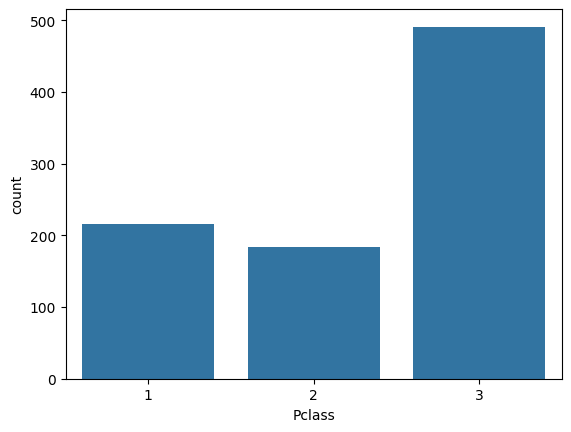

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Pclass',data=data)
plt.show()

In [19]:
female_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]
print(female_survived['Name'])

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object


In [20]:
passengers = data[(data['Pclass'] == 3) & (data['Age'] <18)]
print(passengers['Name'])

7               Palsson, Master. Gosta Leonard
10             Sandstrom, Miss. Marguerite Rut
14        Vestrom, Miss. Hulda Amanda Adolfina
16                        Rice, Master. Eugene
22                 McGowan, Miss. Anna "Annie"
                        ...                   
844                        Culumovic, Mr. Jeso
850    Andersson, Master. Sigvard Harald Elias
852                    Boulos, Miss. Nourelain
869            Johnson, Master. Harold Theodor
875           Najib, Miss. Adele Kiamie "Jane"
Name: Name, Length: 78, dtype: object


In [21]:
passengers1 = data[(data['Pclass'] == 1) & (data['Age'] >40)]
print(passengers1['Name'])

6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
35                        Holverson, Mr. Alexander Oskar
52              Harper, Mrs. Henry Sleeper (Myna Haxtun)
54                        Ostby, Mr. Engelhart Cornelius
                             ...                        
856           Wick, Mrs. George Dennick (Mary Hitchcock)
857                               Daly, Mr. Peter Denis 
862    Swift, Mrs. Frederick Joel (Margaret Welles Ba...
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
Name: Name, Length: 76, dtype: object


In [22]:
passengers1_survived = data[(data['Pclass'] == 1) & (data['Age'] >40) & data['Survived']==1]
print(passengers1_survived['Name'])

11                              Bonnell, Miss. Elizabeth
52              Harper, Mrs. Henry Sleeper (Myna Haxtun)
187        Romaine, Mr. Charles Hallace ("Mr C Rolmane")
194            Brown, Mrs. James Joseph (Margaret Tobin)
195                                 Lurette, Miss. Elise
268        Graham, Mrs. William Thompson (Edith Junkins)
275                    Andrews, Miss. Kornelia Theodosia
299      Baxter, Mrs. James (Helene DeLaudeniere Chaput)
337                      Burns, Miss. Elizabeth Margaret
366     Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
380                                Bidois, Miss. Rosalie
449                       Peuchen, Major. Arthur Godfrey
453                             Goldenberg, Mr. Samuel L
460                                  Anderson, Mr. Harry
496                       Eustis, Miss. Elizabeth Mussey
513       Rothschild, Mrs. Martin (Elizabeth L. Barrett)
523      Hippach, Mrs. Louis Albert (Ida Sophia Fischer)
556    Duff Gordon, Lady. (Luci

In [24]:
passengers2 = data[(data['Sex'] == 'male') & (data['Fare'] >100) ]
print(passengers2['Name'])

27                 Fortune, Mr. Charles Alexander
118                      Baxter, Mr. Quigg Edmond
305                Allison, Master. Hudson Trevor
332                     Graham, Mr. George Edward
373                           Ringhini, Mr. Sante
377                     Widener, Mr. Harry Elkins
390                    Carter, Mr. William Ernest
438                             Fortune, Mr. Mark
505    Penasco y Castellana, Mr. Victor de Satode
527                            Farthing, Mr. John
544                    Douglas, Mr. Walter Donald
550                   Thayer, Mr. John Borland Jr
557                           Robbins, Mr. Victor
659                    Newell, Mr. Arthur Webster
660                 Frauenthal, Dr. Henry William
679            Cardeza, Mr. Thomas Drake Martinez
698                      Thayer, Mr. John Borland
737                        Lesurer, Mr. Gustave J
802           Carter, Master. William Thornton II
Name: Name, dtype: object


In [25]:
passengers3= data[(data['Embarked'] == 'C') & (data['Pclass'] ==2) ]
print(passengers3['Name'])

9                    Nasser, Mrs. Nicholas (Adele Achem)
43              Laroche, Miss. Simonne Marie Anne Andree
122                                 Nasser, Mr. Nicholas
135                                   Richard, Mr. Emile
181                                     Pernot, Mr. Rene
292                               Levy, Mr. Rene Jacques
308                                  Abelson, Mr. Samuel
361                            del Carlo, Mr. Sebastiano
389                                Lehmann, Miss. Bertha
473         Jerwan, Mrs. Amin S (Marie Marthe Thuillard)
547                           Padro y Manent, Mr. Julian
608    Laroche, Mrs. Joseph (Juliette Marie Louise La...
685               Laroche, Mr. Joseph Philippe Lemercier
817                                   Mallet, Mr. Albert
827                                Mallet, Master. Andre
866                         Duran y More, Miss. Asuncion
874                Abelson, Mrs. Samuel (Hannah Wizosky)
Name: Name, dtype: object


In [27]:
passengers4= data[(data['SibSp'] >2) ]
print(passengers4['Name'])

7                         Palsson, Master. Gosta Leonard
16                                  Rice, Master. Eugene
24                         Palsson, Miss. Torborg Danira
27                        Fortune, Mr. Charles Alexander
50                            Panula, Master. Juha Niilo
59                    Goodwin, Master. William Frederick
63                                 Skoog, Master. Harald
68                       Andersson, Miss. Erna Alexandra
71                            Goodwin, Miss. Lillian Amy
85     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
88                            Fortune, Miss. Mabel Helen
119                    Andersson, Miss. Ellis Anna Maria
159                           Sage, Master. Thomas Henry
164                         Panula, Master. Eino Viljami
171                                 Rice, Master. Arthur
176                        Lefebre, Master. Henry Forbes
180                         Sage, Miss. Constance Gladys
182                Asplund, Mas

In [31]:
passengers5 = data[(data['Survived'] == 0) & (data['SibSp'] ==0) & (data['Parch']==0)]
print(passengers5['Name'])

4                  Allen, Mr. William Henry
5                          Moran, Mr. James
6                   McCarthy, Mr. Timothy J
12           Saundercock, Mr. William Henry
14     Vestrom, Miss. Hulda Amanda Adolfina
                       ...                 
882            Dahlberg, Miss. Gerda Ulrika
883           Banfield, Mr. Frederick James
884                  Sutehall, Mr. Henry Jr
886                   Montvila, Rev. Juozas
890                     Dooley, Mr. Patrick
Name: Name, Length: 374, dtype: object


In [32]:
passengers6= data[(data['Survived'] ==1) ].sort_values(by='Age',ascending=False).head(5)
print(passengers6['Name'])

630         Barkworth, Mr. Algernon Henry Wilson
275            Andrews, Miss. Kornelia Theodosia
483                       Turkula, Mrs. (Hedwig)
570                           Harris, Mr. George
829    Stone, Mrs. George Nelson (Martha Evelyn)
Name: Name, dtype: object


In [33]:
passengers7= data[(data['Fare'] == 0)  ]
print(passengers7['Name'])

179                 Leonard, Mr. Lionel
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
277         Parkes, Mr. Francis "Frank"
302     Johnson, Mr. William Cahoone Jr
413      Cunningham, Mr. Alfred Fleming
466               Campbell, Mr. William
481    Frost, Mr. Anthony Wood "Archie"
597                 Johnson, Mr. Alfred
633       Parr, Mr. William Henry Marsh
674          Watson, Mr. Ennis Hastings
732                Knight, Mr. Robert J
806              Andrews, Mr. Thomas Jr
815                    Fry, Mr. Richard
822     Reuchlin, Jonkheer. John George
Name: Name, dtype: object


In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print("\nTraining set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)


Training set shape: (712, 12)
Testing set shape: (179, 12)
